In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pytrends.request import TrendReq

columns = ['City', 'Big Data Job Offers', 'Data Science Job Offers', 'Machine Learning Job Offers']
europe_cities = {}
latam_cities = {}
usa_cities = {}

In [2]:
req1 = TrendReq()
req1.build_payload(kw_list=['big data', 'data science', 'machine learning'])

trends = req1.interest_by_region('CITY')
trendy = trends.drop(trends[(trends['big data'] == 0) & (trends['data science'] == 0) & (trends['machine learning'] == 0)].index)
trendy.sort_index()

,big data,data science,machine learning
geoName,,,
Amsterdam,49,21,30
Bangkok,54,19,27
Barcelona,66,11,23
Bengaluru,41,21,38
Berlin,45,18,37
Bogotá,70,9,21
Chennai,54,18,28
Chicago,35,31,34
Diadema,72,10,18


In [3]:
trends.drop(trends[(trends['big data'] != 0) & (trends['data science'] != 0) & (trends['machine learning'] != 0)].index).sort_index()

,big data,data science,machine learning
geoName,,,
Ahmedabad,0,0,0
Atlanta,0,0,0
Auckland,0,0,0
Austin,0,0,0
Boston,0,0,0
Brisbane,0,0,0
Brussels,0,0,0
Budapest,0,0,0
Buenos Aires,0,0,0


In [4]:
def buildDic(dic, filename):
    f = open(filename, 'r')
    for line in f:
        data = line.strip().split(",")
        city = data[0]
        job_offer = data[1]
        total_count = float(data[2])
        if city not in dic:
            dic[city] = {}
        dic[city][job_offer] = total_count

In [5]:
buildDic(europe_cities,"data/europe.csv")
buildDic(latam_cities, "data/latinAmerica.csv")
buildDic(usa_cities,"data/usa.csv")

In [6]:
def addRows(df, dic):
    for k, v in dic.items():
        df2 = pd.DataFrame(data=[[k, v['Big Data'], v['Data Science'], v['Machine Learning']]], columns=columns)
        df = df.append(df2, ignore_index=True)
    df.index = [(i+1) for i in range(len(dic))]
    return df

In [7]:
def total(df):
    df['Total New Tech Job Offers'] = df.apply(lambda x: x[columns[1]] + x[columns[2]] + x[columns[3]], axis=1)

In [8]:
maindf = pd.DataFrame(columns=columns)

In [9]:
europedf = pd.DataFrame(columns=columns)
europedf = addRows(europedf, europe_cities)

In [10]:
usadf = pd.DataFrame(columns=columns)
usadf = addRows(usadf, usa_cities)

In [11]:
latamdf = pd.DataFrame(columns=columns)
latamdf = addRows(latamdf, latam_cities)

In [12]:
maindf = maindf.append([europedf, usadf, latamdf], ignore_index=True)
maindf = maindf.sort_values('City')
maindf = maindf.reset_index(drop=True)
total(maindf)

In [13]:
maindf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
0,Amsterdam,1318.0,1273.0,516.0,3107.0
1,Atlanta,1599.0,265.0,371.0,2235.0
2,Austin,938.0,349.0,517.0,1804.0
3,Barcelona,435.0,354.0,174.0,963.0
4,Belo Horizonte,15.0,11.0,11.0,37.0
5,Berlin,995.0,1011.0,667.0,2673.0
6,Bogota,61.0,64.0,11.0,136.0
7,Boston,2234.0,6702.0,1271.0,10207.0
8,Brasilia,8.0,6.0,3.0,17.0
9,Brussels,717.0,925.0,221.0,1863.0


In [14]:
total(europedf)
total(latamdf)
total(usadf)

In [15]:
europedf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
1,Amsterdam,1318.0,1273.0,516.0,3107.0
2,Barcelona,435.0,354.0,174.0,963.0
3,Berlin,995.0,1011.0,667.0,2673.0
4,Brussels,717.0,925.0,221.0,1863.0
5,Budapest,274.0,354.0,80.0,708.0
6,Cardiff,57.0,107.0,28.0,192.0
7,Copenhagen,132.0,268.0,126.0,526.0
8,Dublin,570.0,1191.0,242.0,2003.0
9,Estambul,98.0,155.0,31.0,284.0
10,Stockholm,340.0,394.0,213.0,947.0


In [16]:
latamdf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
1,Belo Horizonte,15.0,11.0,11.0,37.0
2,Bogota,61.0,64.0,11.0,136.0
3,Brasilia,8.0,6.0,3.0,17.0
4,Buenos Aires,185.0,187.0,155.0,527.0
5,Cali,1.0,8.0,0.0,9.0
6,Guadalajara,175.0,167.0,82.0,424.0
7,Lima,26.0,18.0,15.0,59.0
8,Medellin,6.0,9.0,0.0,15.0
9,Mexico City,190.0,234.0,49.0,473.0
10,Monterrey,30.0,60.0,12.0,102.0


In [17]:
usadf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
1,Atlanta,1599.0,265.0,371.0,2235.0
2,Austin,938.0,349.0,517.0,1804.0
3,Boston,2234.0,6702.0,1271.0,10207.0
4,Chicago,2045.0,333.0,640.0,3018.0
5,Dallas,1596.0,225.0,454.0,2275.0
6,Houston,674.0,98.0,269.0,1041.0
7,Los Angeles,1592.0,306.0,597.0,2495.0
8,New York,5397.0,10074.0,2196.0,17667.0
9,San Francisco,3867.0,7657.0,2314.0,13838.0
10,Seattle,3593.0,853.0,3153.0,7599.0


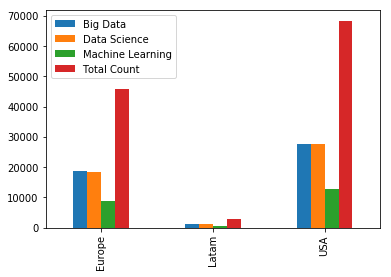

In [18]:
compdf = pd.DataFrame(index=['Europe','Latam','USA'], columns=['Big Data','Data Science','Machine Learning','Total Count'])
compdf.loc['Europe'] = [europedf[columns[1]].sum(),europedf[columns[2]].sum(),europedf[columns[3]].sum(),europedf.iloc[:,-1].sum()]
compdf.loc['Latam'] = [latamdf[columns[1]].sum(),latamdf[columns[2]].sum(),latamdf[columns[3]].sum(),latamdf.iloc[:,-1].sum()]
compdf.loc['USA'] = [usadf[columns[1]].sum(),usadf[columns[2]].sum(),usadf[columns[3]].sum(),usadf.iloc[:,-1].sum()]
compdf.plot.bar()

In [19]:
compdf

,Big Data,Data Science,Machine Learning,Total Count
Europe,18608,18424,8971,46003
Latam,1186,1214,557,2957
USA,27826,27723,12940,68489


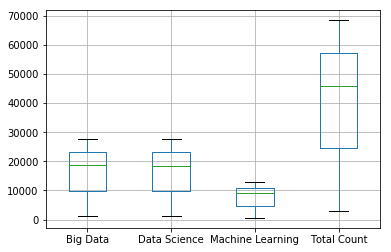

In [20]:
boxplot = compdf.boxplot()

In [21]:
gdp = pd.read_csv('data/cities_gdp.csv')

In [22]:
gdp = gdp.drop(columns=['METRO_ID','Variables','TIME','Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'])

In [23]:
gdp = gdp.sort_values(by='Metropolitan areas')

In [24]:
gdp.head()

,Metropolitan areas,VAR,Year,Value
2545,Aachen,GDP_PC,2002,30473.22
2522,Aachen,GDP,2005,17947.14
2523,Aachen,GDP,2006,18428.38
2524,Aachen,GDP,2007,19001.91
2525,Aachen,GDP,2008,19294.57


In [25]:
gdp_df = gdp.loc[(gdp['VAR'] == 'GDP') & (gdp['Year'] == 2012)]
gdp_df = gdp_df.reset_index(drop=True)
gdp_df = gdp_df.drop(columns=['VAR','Year'])

In [26]:
gdp_pc_df = gdp.loc[(gdp['VAR'] == 'GDP_PC') & (gdp['Year'] == 2012)]
gdp_pc_df = gdp_pc_df.reset_index(drop=True)
gdp_pc_df = gdp_pc_df.drop(columns=['VAR','Year'])

In [27]:
gdp_df.columns = ['City','GDP']

In [28]:
gdp_pc_df.columns = ['City','GDP per Capita']

In [29]:
gdp_df.head()

,City,GDP
0,Aachen,19496.51
1,Acapulco de Juárez,6125.81
2,Adelaide,47478.78
3,Aguascalientes,15768.23
4,Akron,24969.01


In [30]:
gdp_pc_df.head()

,City,GDP per Capita
0,Aachen,33754.05
1,Acapulco de Juárez,7574.58
2,Adelaide,37133.41
3,Aguascalientes,15739.52
4,Akron,46105.97


In [31]:
latam_cities_gdp = pd.read_csv('data/latam_cities_GDP.csv',header=None)
latam_cities_gdp.columns=['Rank','City','Country','Population','GDP per capita']
latam_cities_gdp['GDP'] = latam_cities_gdp.apply(lambda x : float("%.2f" % (int(x['Population'])*int(x['GDP per capita'])/1000000)),axis=1)
latam_cities_gdp.drop(latam_cities_gdp.columns[[0,2,3]], axis=1, inplace=True)

In [32]:
latam_cities_gdp

,City,GDP per capita,GDP
0,Mexico City,16239,373118.63
1,Sao Paulo,25650,534738.38
2,Buenos Aires,35906,555889.51
3,Rio de Janeiro,23176,288777.60
4,Lima,15530,165769.02
5,Bogota,21497,196392.29
6,Santiago,28929,207258.93
7,Belo Horizonte,20134,112665.84
8,Guadalajara,14206,66593.47
9,Caracas,15890,51804.58


In [33]:
merge = pd.merge(maindf, gdp_df, how='inner', on='City')

In [34]:
merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
0,Amsterdam,1318.0,1273.0,516.0,3107.0,121289.27
1,Atlanta,1599.0,265.0,371.0,2235.0,263711.72
2,Austin,938.0,349.0,517.0,1804.0,96379.31
3,Barcelona,435.0,354.0,174.0,963.0,135803.15
4,Berlin,995.0,1011.0,667.0,2673.0,165376.72
5,Boston,2234.0,6702.0,1271.0,10207.0,305833.34
6,Brussels,717.0,925.0,221.0,1863.0,134939.93
7,Budapest,274.0,354.0,80.0,708.0,102939.82
8,Cardiff,57.0,107.0,28.0,192.0,20212.78
9,Chicago,2045.0,333.0,640.0,3018.0,554230.82


In [35]:
# Correlacion por el total de ofertas de trabajo
merge['Total New Tech Job Offers'].corr(merge['GDP'])

0.734663456389877

In [36]:
#Correlacion por ofertas de trabajo de Big Data
merge['Big Data Job Offers'].astype('int').corr(merge['GDP'])

0.7732091387528776

In [37]:
#Correlacion por ofertas de trabajo de Data Science
merge['Data Science Job Offers'].astype('int').corr(merge['GDP'])

0.6461216610737379

In [38]:
#Correlacion por ofertas de trabajo de Machine Learning
merge['Machine Learning Job Offers'].astype('int').corr(merge['GDP'])

0.6084486699728913

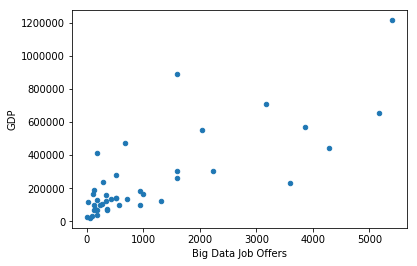

In [39]:
merge.plot.scatter(x='Big Data Job Offers',y='GDP')

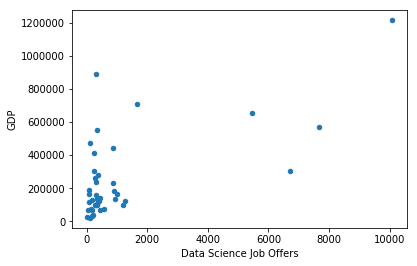

In [40]:
merge.plot.scatter(x='Data Science Job Offers',y='GDP')

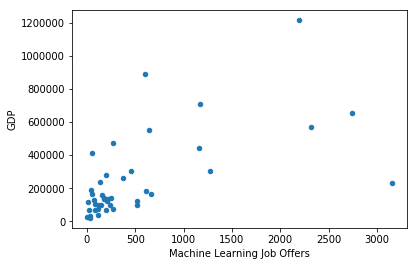

In [41]:
merge.plot.scatter(x='Machine Learning Job Offers',y='GDP')

In [42]:
europe_merge = pd.merge(europedf, gdp_df, how='inner', on='City')
usa_merge = pd.merge(usadf, gdp_df, how='inner', on='City')
latam_merge = pd.merge(latamdf, latam_cities_gdp, how='inner', on='City')

In [43]:
europe_merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
0,Amsterdam,1318.0,1273.0,516.0,3107.0,121289.27
1,Barcelona,435.0,354.0,174.0,963.0,135803.15
2,Berlin,995.0,1011.0,667.0,2673.0,165376.72
3,Brussels,717.0,925.0,221.0,1863.0,134939.93
4,Budapest,274.0,354.0,80.0,708.0,102939.82
5,Cardiff,57.0,107.0,28.0,192.0,20212.78
6,Copenhagen,132.0,268.0,126.0,526.0,98431.89
7,Dublin,570.0,1191.0,242.0,2003.0,95902.65
8,Stockholm,340.0,394.0,213.0,947.0,124384.82
9,Frankfurt,511.0,381.0,180.0,1072.0,143516.43


In [44]:
#Correlacion por el total de ofertas de trabajo
print('Total:', europe_merge['Total New Tech Job Offers'].corr(europe_merge['GDP']))
#Correlacion por ofertas de trabajo de Big Data
print('Big Data:', europe_merge['Big Data Job Offers'].astype('int').corr(europe_merge['GDP']))
#Correlacion por ofertas de trabajo de Data Science
print('Data Science:', europe_merge['Data Science Job Offers'].astype('int').corr(europe_merge['GDP']))
#Correlacion por ofertas de trabajo de Machine Learning
print('Machine Learning:', europe_merge['Machine Learning Job Offers'].astype('int').corr(europe_merge['GDP']))

Total: 0.826570577757042
Big Data: 0.8866971772413367
Data Science: 0.7423042704648753
Machine Learning: 0.8209280417647304


In [45]:
total_europe = europe_merge['Total New Tech Job Offers'].sum()
total_europe

44728.0

In [46]:
usa_merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
0,Atlanta,1599.0,265.0,371.0,2235.0,263711.72
1,Austin,938.0,349.0,517.0,1804.0,96379.31
2,Boston,2234.0,6702.0,1271.0,10207.0,305833.34
3,Chicago,2045.0,333.0,640.0,3018.0,554230.82
4,Dallas,1596.0,225.0,454.0,2275.0,304270.25
5,Houston,674.0,98.0,269.0,1041.0,470838.44
6,Los Angeles,1592.0,306.0,597.0,2495.0,891793.72
7,New York,5397.0,10074.0,2196.0,17667.0,1215233.96
8,San Francisco,3867.0,7657.0,2314.0,13838.0,568072.44
9,Seattle,3593.0,853.0,3153.0,7599.0,231514.38


In [47]:
#Correlacion por el total de ofertas de trabajo
print('Total:', usa_merge['Total New Tech Job Offers'].corr(usa_merge['GDP']))
#Correlacion por ofertas de trabajo de Big Data
print('Big Data:', usa_merge['Big Data Job Offers'].astype('int').corr(usa_merge['GDP']))
#Correlacion por ofertas de trabajo de Data Science
print('Data Science:', usa_merge['Data Science Job Offers'].astype('int').corr(usa_merge['GDP']))
#Correlacion por ofertas de trabajo de Machine Learning
print('Machine Learning:', usa_merge['Machine Learning Job Offers'].astype('int').corr(usa_merge['GDP']))

Total: 0.5337637785215862
Big Data: 0.5128208206637318
Data Science: 0.5378136587466198
Machine Learning: 0.2014171622821191


In [48]:
total_usa = usa_merge['Total New Tech Job Offers'].sum()
total_usa

68489.0

In [49]:
latam_merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP per capita,GDP
0,Belo Horizonte,15.0,11.0,11.0,37.0,20134,112665.84
1,Bogota,61.0,64.0,11.0,136.0,21497,196392.29
2,Buenos Aires,185.0,187.0,155.0,527.0,35906,555889.51
3,Guadalajara,175.0,167.0,82.0,424.0,14206,66593.47
4,Lima,26.0,18.0,15.0,59.0,15530,165769.02
5,Mexico City,190.0,234.0,49.0,473.0,16239,373118.63
6,Rio de Janeiro,19.0,18.0,13.0,50.0,23176,288777.60
7,Santiago,102.0,61.0,49.0,212.0,28929,207258.93
8,Sao Paulo,341.0,333.0,118.0,792.0,25650,534738.38


In [50]:
#Correlacion por el total de ofertas de trabajo
print('Total:', latam_merge['Total New Tech Job Offers'].corr(latam_merge['GDP']))
#Correlacion por ofertas de trabajo de Big Data
print('Big Data:', latam_merge['Big Data Job Offers'].astype('int').corr(latam_merge['GDP']))
#Correlacion por ofertas de trabajo de Data Science
print('Data Science:', latam_merge['Data Science Job Offers'].astype('int').corr(latam_merge['GDP']))
#Correlacion por ofertas de trabajo de Machine Learning
print('Machine Learning:', latam_merge['Machine Learning Job Offers'].astype('int').corr(latam_merge['GDP']))

Total: 0.7137479028661143
Big Data: 0.6695436090138939
Data Science: 0.6912077083588487
Machine Learning: 0.7168572156844988


In [51]:
total_latam = latam_merge['Total New Tech Job Offers'].sum()
total_latam

2710.0

In [52]:
total = total_europe + total_usa + total_latam
total

115927.0

In [53]:
europe_perc = (total_europe*100)/total
usa_perc = (total_usa*100)/total
latam_perc = (total_latam*100)/total
print('Trabajos ofertados en Europa representan el %.2f porciento de trabajos en el dataset'%europe_perc)
print('Trabajos ofertados en USA representan el %.2f porciento de trabajos en el dataset'%usa_perc)
print('Trabajos ofertados en Latino America representan el %.2f porciento de trabajos en el dataset'%latam_perc)

Trabajos ofertados en Europa representan el 38.58 porciento de trabajos en el dataset
Trabajos ofertados en USA representan el 59.08 porciento de trabajos en el dataset
Trabajos ofertados en Latino America representan el 2.34 porciento de trabajos en el dataset


TEXT ANALYSIS

In [55]:
import glob
europe_files = glob.glob('data/Europe/*.csv')
usa_files = glob.glob('data/USA/*.csv')
latam_files = glob.glob('data/Latin America/*.csv')

In [217]:
import nltk
my_stpwrds = ['big','data','machine','learning','science','jobs','job','non']
stpwrds = nltk.corpus.stopwords.words('english')
stpwrds_es = nltk.corpus.stopwords.words('spanish')
stpwrds_fr = nltk.corpus.stopwords.words('french')
stopwords = set(stpwrds+stpwrds_es+stpwrds_fr+my_stpwrds)

In [305]:
cities_eu = []

In [306]:
europe_dfdic = {}
for f in europe_files:
    path = f.split("/")
    data = path[2].split(".")[0].split("_")
    if data[0] not in cities_eu:
        cities_eu.append(data[0])
    city_job = ' '.join(data)
    europe_dfdic[city_job] = pd.read_csv(f)

In [290]:
cities_usa = []

In [303]:
usa_dfdic = {}
for f in usa_files:
    path = f.split("/")
    data = path[2].split(".")[0].split("_")
    city = ""
    if len(data) > 3:
        city = data[0]+" "+data[1]
    else:
        city = data[0]
    if city not in cities_usa:
        cities_usa.append(city)
    city_job = ' '.join(data)
    usa_dfdic[city_job] = pd.read_csv(f)

In [308]:
cities_latam = []

In [309]:
latam_dfdic = {}
for f in latam_files:
    path = f.split("/")
    data = path[2].split(".")[0].split("_")
    city = ""
    if len(data) > 3:
        city = data[0]+" "+data[1]
    else:
        city = data[0]
    if city not in cities_latam:
        cities_latam.append(city)
    city_job = ' '.join(data)
    latam_dfdic[city_job] = pd.read_csv(f)

In [201]:
from string import punctuation
from wordcloud import WordCloud

In [318]:
def foo(cities,regdic):
    dic = {}
    for city in cities:
        summaries = []
        for k in regdic:
            if city in k:
                words = regdic[k]['summary'][i].split(' ')
                for word in words:
                    w = word.lower().rstrip(punctuation)
                    summaries.append(w)
        dic[city] = summaries
    return dic

In [319]:
foo(cities_latam,latam_dfdic)

{'Sao Paulo': ['',
  'in-progress',
  'degree',
  'in',
  'computer',
  'science',
  'or',
  'related',
  'field',
  'on-track',
  'for',
  'a',
  'degree',
  'in',
  'computer',
  'science',
  'or',
  'related',
  'field',
  '',
  'excellent',
  'educational',
  'background',
  'in',
  'a',
  'quantitative',
  'field',
  'such',
  'as',
  'computer',
  'science',
  'statistics',
  'or',
  'machine',
  'learning',
  '',
  'experiência',
  'em',
  'projetos',
  'de',
  'big',
  'data',
  'ferramentas',
  'big',
  'data',
  '(hadoop',
  'hbase',
  'flume',
  'kafka',
  'spark',
  'accenture',
  'digital',
  'que',
  'digitaliza',
  'os',
  'negócios',
  'dos',
  'nossos',
  'clientes'],
 'Bogota': ['',
  'must',
  'possess',
  'good',
  'communication',
  'arithmetic',
  'data',
  'entry',
  'and',
  'recording',
  'skills',
  'ensures',
  'that',
  'expected',
  'and',
  'needed',
  'data',
  'and',
  'possible',
  'problems',
  'are',
  'provided',
  'to',
  'the',
  '',
  'una',
  'ca

In [233]:
# devuelve word cloud por region
def make_wc(dic,stopwords):
    list_of_summaries = []
    for k in dic:
        for i in range(len(dic)):
            words = dic[k]['summary'][i].split(' ')
            for word in words:
                w = word.lower().rstrip(punctuation)
                list_of_summaries.append(w)

    wc = WordCloud(stopwords=stopwords, width=1000, height=500).generate(" ".join(set(list_of_summaries)))

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # wc.to_image().show()
    return wc

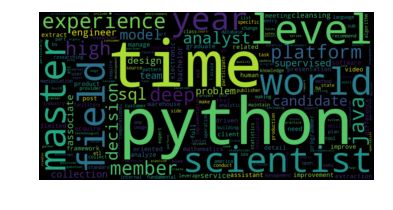

In [234]:
w_usa = make_wc(usa_dfdic,stopwords)

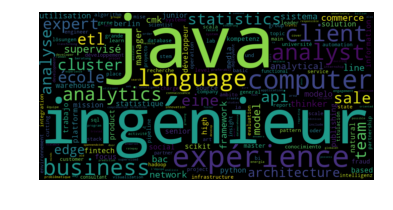

In [239]:
wc_europe = make_wc(europe_dfdic,stopwords)

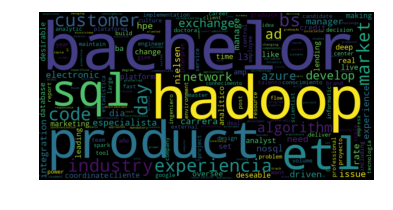

In [240]:
wc_latam = make_wc(latam_dfdic,stopwords)

In [241]:
usa_set = set(wc_usa.words_.keys())
eu_set = set(wc_europe.words_.keys())
latam_set = set(wc_latam.words_.keys())

In [242]:
words_in_all = set.intersection(usa_set,eu_set,latam_set)

In [257]:
def inter_dict(word_set,d1,d2,d3):
    dic = {}
    for word in word_set:
        dic[word] = (d1[word],d2[word],d3[word])
    return dic

In [268]:
word_dic = inter_dict(words_in_all, wc_usa.words_, wc_europe.words_, wc_latam.words_)

In [284]:
df = pd.DataFrame(word_dic,index=['USA','Europe','Latam'])
df = df.T

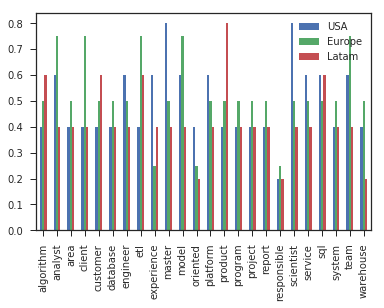

In [283]:
ax = df.plot.bar()

LINEAR REGRESSION

In [63]:
pop = pd.read_csv('data/PEP_2012_PEPANNRSIP.US12A_with_ann.csv',header = [0,1])

In [64]:
pop.head()

,"(GEO.id, Id)","(GEO.id2, Id2)","(GEO.display-label, Geography)","(GC_RANK.target-geo-id, Target Geo Id)","(GC_RANK.target-geo-id2, Target Geo Id2)","(GC_RANK.rank-label, Rank)","(GC_RANK.display-label, Geography)","('GC_RANK.display-label', 'Geography').1","(rescensus42010, April 1, 2010 - Census)","(resbase42010, April 1, 2010 - Estimates Base)","(respop72010, Population Estimate (as of July 1) - 2010)","(respop72011, Population Estimate (as of July 1) - 2011)","(respop72012, Population Estimate (as of July 1) - 2012)"
0,0100000US,NaN,United States,1620000US3651000,3651000,1,"United States - New York city, New York","New York city, New York",8175133,8175136,8189997,8269639,8336697
1,0100000US,NaN,United States,1620000US0644000,644000,2,"United States - Los Angeles city, California","Los Angeles city, California",3792621,3792627,3795781,3823316,3857799
2,0100000US,NaN,United States,1620000US1714000,1714000,3,"United States - Chicago city, Illinois","Chicago city, Illinois",2695598,2695598,2697843,2705248,2714856
3,0100000US,NaN,United States,1620000US4835000,4835000,4,"United States - Houston city, Texas","Houston city, Texas",2099451,2097217,2102680,2126196,2160821
4,0100000US,NaN,United States,1620000US4260000,4260000,5,"United States - Philadelphia city, Pennsylvania","Philadelphia city, Pennsylvania",1526006,1526006,1528458,1538567,1547607


In [65]:
pop.drop(pop.columns[[0,1,2,3,4,5,6,8,9,10,11]], axis=1, inplace=True)
pop.columns = ['City','Population']

In [66]:
def change_name(x):
    name = x['City'].split(",")
    city = name[0].split(" ")
    city.pop(-1)
    return ' '.join(city)

In [67]:
pop['City'] = pop.apply(change_name, axis=1)

In [68]:
pop.head()

,City,Population
0,New York,8336697
1,Los Angeles,3857799
2,Chicago,2714856
3,Houston,2160821
4,Philadelphia,1547607


In [69]:
usa_merge = pd.merge(usa_merge, pop, how='inner', on='City')

In [70]:
usa_merge['GDP per Capita'] = usa_merge.apply(lambda x : x['GDP']/x['Population'], axis=1)

In [71]:
usa_merge.head()

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP,Population,GDP per Capita
0,Atlanta,1599.0,265.0,371.0,2235.0,263711.72,443775,0.594246
1,Austin,938.0,349.0,517.0,1804.0,96379.31,842592,0.114384
2,Boston,2234.0,6702.0,1271.0,10207.0,305833.34,636479,0.480508
3,Chicago,2045.0,333.0,640.0,3018.0,554230.82,2714856,0.204147
4,Dallas,1596.0,225.0,454.0,2275.0,304270.25,1241162,0.245150


In [72]:
import numpy as np

In [73]:
merge.index = merge['City']
merge.drop(columns=['City'],inplace=True)

In [74]:
log_merge = merge.apply(lambda x : np.log(x),axis=1)

In [75]:
log_merge.head()

,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
City,,,,,
Amsterdam,7.183871,7.149132,6.246107,8.041413,11.705934
Atlanta,7.377134,5.579730,5.916202,7.711997,12.482612
Austin,6.843750,5.855072,6.248043,7.497762,11.476047
Barcelona,6.075346,5.869297,5.159055,6.870053,11.818962
Berlin,6.902743,6.918695,6.502790,7.890957,12.015981


In [76]:
merge.head()

,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
City,,,,,
Amsterdam,1318.0,1273.0,516.0,3107.0,121289.27
Atlanta,1599.0,265.0,371.0,2235.0,263711.72
Austin,938.0,349.0,517.0,1804.0,96379.31
Barcelona,435.0,354.0,174.0,963.0,135803.15
Berlin,995.0,1011.0,667.0,2673.0,165376.72


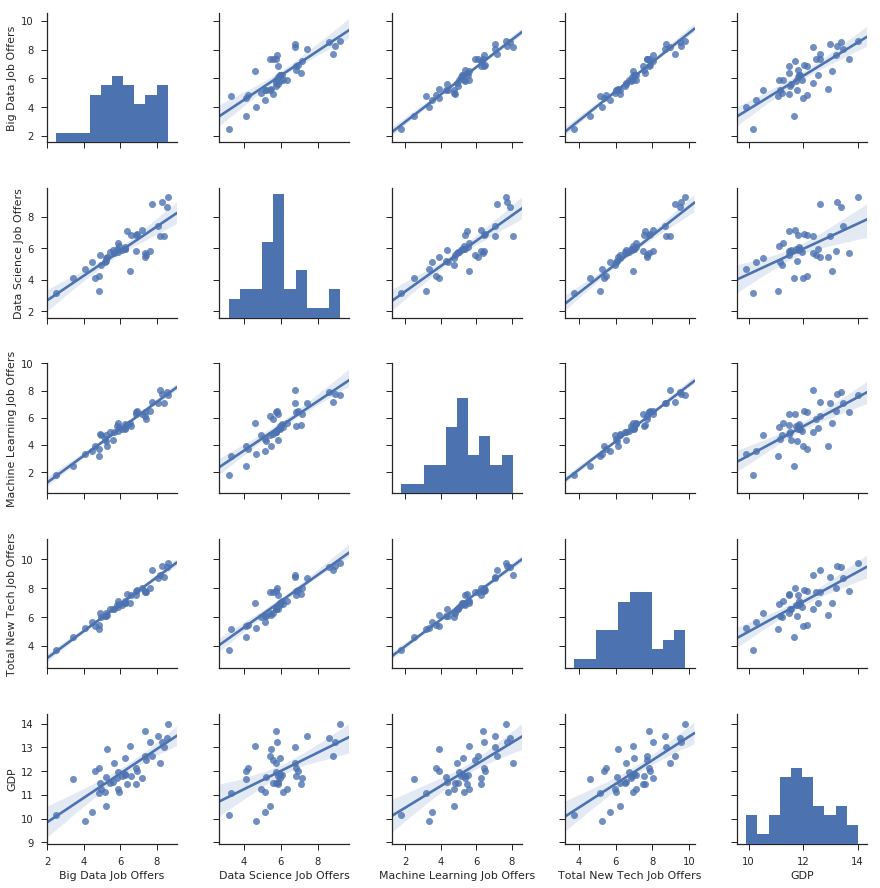

In [77]:
# Exploratory analysis
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(log_merge, kind="reg")

In [78]:
X = log_merge.iloc[:, 0:4].values
X2 = log_merge.iloc[:, 0].values
X3 = log_merge.iloc[:, 1].values
X4 = log_merge.iloc[:, 2].values
X5 = log_merge.iloc[:, 3].values
Y = log_merge.iloc[:, -1].values

In [79]:
len(X2)

42

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
def createPlot(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    t = X_train.shape
    if len(t) == 1:
        X_train = X_train[np.newaxis].T
        X_test = X_test[np.newaxis].T
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
    Y_pred = regressor.predict(X_test)

    plt.scatter(X_test, Y_test, color='green')
    plt.plot(X_test, Y_pred, color='black')

    plt.show()

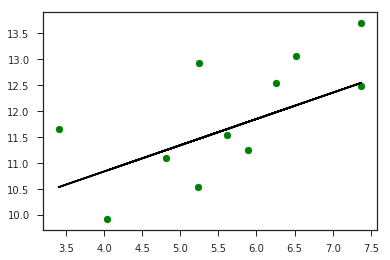

In [82]:
createPlot(X2,Y)

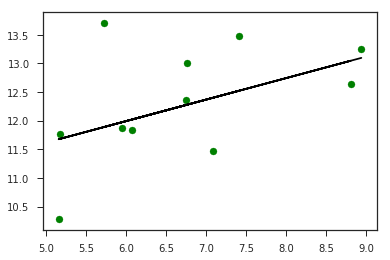

In [83]:
createPlot(X3,Y)

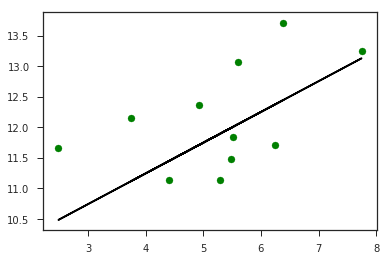

In [84]:
createPlot(X4,Y)

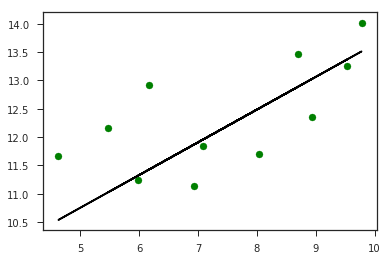

In [85]:
createPlot(X5,Y)

In [86]:
import statsmodels.regression.linear_model as sm
from statsmodels.tools.tools import add_constant

In [87]:
def createStatsmodel(X,Y):
    X_opt = add_constant(X, prepend=True)
    regressor_ols = sm.OLS(endog=Y, exog=X_opt).fit()
    initial_summary = regressor_ols.summary()
    pvalues = regressor_ols.pvalues
    
    while max(pvalues > 0.05):
        max_index = np.argmax(pvalues)
        X_opt = np.delete(X_opt, max_index, axis=1)
        regressor_ols = sm.OLS(endog=Y, exog=X_opt).fit()
        pvalues = regressor_ols.pvalues
    
    return regressor_ols.summary()

In [88]:
createStatsmodel(X,Y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     58.80
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           2.24e-09
Time:                        21:55:27   Log-Likelihood:                -37.799
No. Observations:                  42   AIC:                             79.60
Df Residuals:                      40   BIC:                             83.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8277      0.424     20.843      0.000       7.972       9.684
x1             0.5134      0.067      7.668      0.000       0.378       0.649
==============================================================================
Omnibus:                        1.445   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                1.417
Skew:                           0.372   Prob(JB):                        0.492
Kurtosis:                       2.494   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
createStatsmodel(X2,Y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     58.80
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           2.24e-09
Time:                        21:55:27   Log-Likelihood:                -37.799
No. Observations:                  42   AIC:                             79.60
Df Residuals:                      40   BIC:                             83.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8277      0.424     20.843      0.000       7.972       9.684
x1             0.5134      0.067      7.668      0.000       0.378       0.649
==============================================================================
Omnibus:                        1.445   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                1.417
Skew:                           0.372   Prob(JB):                        0.492
Kurtosis:                       2.494   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
createStatsmodel(X3,Y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     17.81
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           0.000136
Time:                        21:55:27   Log-Likelihood:                -49.054
No. Observations:                  42   AIC:                             102.1
Df Residuals:                      40   BIC:                             105.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6962      0.558     17.369      0.000       8.568      10.824
x1             0.3860      0.091      4.220      0.000       0.201       0.571
==============================================================================
Omnibus:                        0.499   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.620
Skew:                           0.218   Prob(JB):                        0.733
Kurtosis:                       2.595   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
createStatsmodel(X4,Y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     38.36
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           2.53e-07
Time:                        21:55:27   Log-Likelihood:                -42.667
No. Observations:                  42   AIC:                             89.33
Df Residuals:                      40   BIC:                             92.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5415      0.410     23.280      0.000       8.713      10.370
x1             0.4576      0.074      6.193      0.000       0.308       0.607
==============================================================================
Omnibus:                        1.084   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                1.091
Skew:                           0.274   Prob(JB):                        0.580
Kurtosis:                       2.432   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
createStatsmodel(X5,Y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     43.34
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           7.17e-08
Time:                        21:55:27   Log-Likelihood:                -41.374
No. Observations:                  42   AIC:                             86.75
Df Residuals:                      40   BIC:                             90.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4546      0.547     15.446      0.000       7.348       9.561
x1             0.5017      0.076      6.583      0.000       0.348       0.656
==============================================================================
Omnibus:                        1.330   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.243
Skew:                           0.284   Prob(JB):                        0.537
Kurtosis:                       2.377   Cond. No.                         39.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""